In this exercise, you are going to run some experiments involving multi-layer perceptrons (MLPs). You can
implement them in Pytorch as well (see the instructions at the beginning of Exercise 2).

1. (12 pts) Implement a three-layer MLP (details below) and train it on the MNIST dataset. The details
of the MLP architecture are:
- Linear(784, 512) - ReLU
- Linear(512, 512) - BatchNorm(512) - ReLU
- Linear(512, 10)
You should use the cross-entropy loss torch.nn.CrossEntropyLoss at the end. Also, use the SGD
optimizer with momentum=0.9.
[If you used 600 images per class in Exercise 2, then use the same images here.]
Note: You will need to flatten your images from 28×28 to 784×1 vectors, because the MLP expects a
vector as an input.

In [ ]:
import os
import numpy as np
import torch
import torch.nn as nn
from torchvision import datasets, transforms, models
import pandas as pd
from torch.utils.data import DataLoader
import time
import matplotlib.pyplot as plt
import torch.optim as optim
from torch.utils.data import random_split

In [ ]:
# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.RandomGrayscale(), ##not sure
                                transforms.Normalize((0.5,), (0.5,))])

train_data  = datasets.MNIST('~/.pytorch/MNIST_data/', download = True, train = True, transform = transform)
test_data  = datasets.MNIST('~/.pytorch/MNIST_data/', download = True, train = False, transform = transform)

train_loader = DataLoader(train_data, batch_size = 64, shuffle = True)
test_loader = DataLoader(test_data, batch_size = 64, shuffle = False)

100%|██████████| 9912422/9912422 [00:00<00:00, 104316643.57it/s]


Extracting /root/.pytorch/MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to /root/.pytorch/MNIST_data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 49162213.40it/s]


Extracting /root/.pytorch/MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to /root/.pytorch/MNIST_data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 56684846.62it/s]

Extracting /root/.pytorch/MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to /root/.pytorch/MNIST_data/MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 10292019.86it/s]


Extracting /root/.pytorch/MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to /root/.pytorch/MNIST_data/MNIST/raw



In [ ]:
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(784, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.BatchNorm1d(512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )

    def forward(self, x):
        x = x.view(x.size(0), -1)  # Flatten the input images
        x = self.layers(x)
        return x

In [ ]:
model = MLP()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

train_losses = []
test_losses = []
train_acc = []
test_acc = []

# Train the MLP
for epoch in range(20):  # Number of epochs
    train_loss = 0.0
    train_correct = 0.0
    model.train()
    for images, labels in train_loader:
        optimizer.zero_grad()
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        _, predicted = torch.max(output.data, 1)
        train_correct += (predicted == labels).sum().item()

    train_losses.append(train_loss/len(train_loader))
    train_acc.append(100 * train_correct / len(train_loader.dataset))

    test_loss = 0.0
    test_correct = 0.0
    model.eval()
    with torch.no_grad():
        for images, labels in test_loader:
            output = model(images)
            loss = criterion(output, labels)
            test_loss += loss.item()
            _, predicted = torch.max(output.data, 1)
            test_correct += (predicted == labels).sum().item()

    test_losses.append(test_loss/len(test_loader))
    test_acc.append(100 * test_correct / len(test_loader.dataset))

    print(f"Epoch: {epoch+1}, Training Loss: {train_losses[-1]:.4f}, Training Accuracy: {train_acc[-1]:.2f}%, Test Loss: {test_losses[-1]:.4f}, Test Accuracy: {test_acc[-1]:.2f}%")



Epoch: 1, Training Loss: 0.2221, Training Accuracy: 93.34%, Test Loss: 0.1191, Test Accuracy: 96.34%
Epoch: 2, Training Loss: 0.1003, Training Accuracy: 97.01%, Test Loss: 0.0986, Test Accuracy: 96.88%
Epoch: 3, Training Loss: 0.0703, Training Accuracy: 97.87%, Test Loss: 0.0862, Test Accuracy: 97.24%
Epoch: 4, Training Loss: 0.0547, Training Accuracy: 98.30%, Test Loss: 0.0681, Test Accuracy: 97.84%
Epoch: 5, Training Loss: 0.0425, Training Accuracy: 98.71%, Test Loss: 0.0776, Test Accuracy: 97.52%
Epoch: 6, Training Loss: 0.0352, Training Accuracy: 98.90%, Test Loss: 0.0601, Test Accuracy: 98.03%
Epoch: 7, Training Loss: 0.0281, Training Accuracy: 99.15%, Test Loss: 0.0539, Test Accuracy: 98.46%
Epoch: 8, Training Loss: 0.0226, Training Accuracy: 99.35%, Test Loss: 0.0642, Test Accuracy: 98.05%
Epoch: 9, Training Loss: 0.0204, Training Accuracy: 99.38%, Test Loss: 0.0597, Test Accuracy: 98.12%
Epoch: 10, Training Loss: 0.0176, Training Accuracy: 99.44%, Test Loss: 0.0544, Test Accura

2. (3 pts) After the training process, create the following plots:
(a) test accuracy vs the number of epochs
(b) training accuracy vs the number of epochs
(c) test loss vs the number of epochs
(d) training loss vs the number of epochs
[If timing is a concern, train the neural networks for 20 epochs. Although 20 epochs is not sufficient to
reach convergence, it is sufficient to see the trend. You can reduce the number of epochs further if it is
infeasible to train for 20 epochs.]

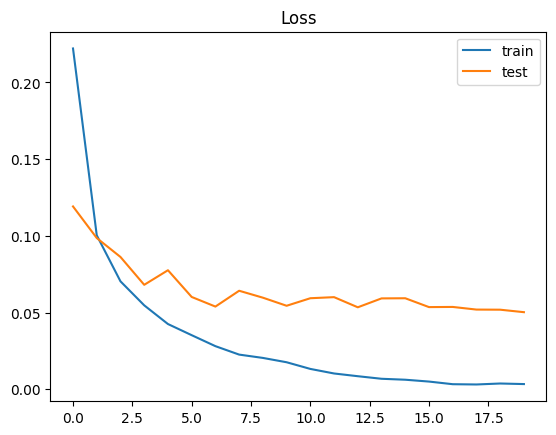

In [ ]:
plt.plot(train_losses)
plt.plot(test_losses)
plt.title('Loss')
plt.legend(['train','test'])
plt.savefig('loss.png')
plt.show()

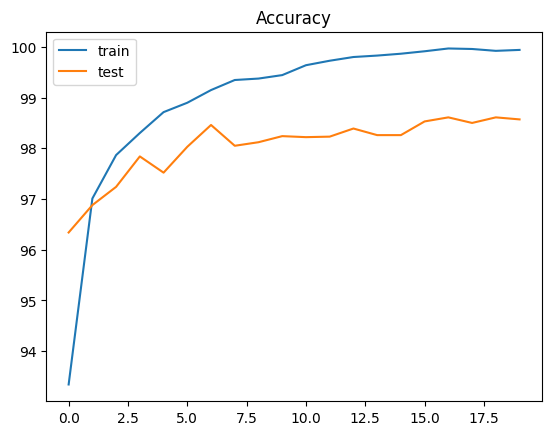

In [ ]:
plt.plot(train_acc)
plt.plot(test_acc)
plt.title('Accuracy')
plt.legend(['train','test'])
plt.savefig('acc.png')
plt.show()

3. (5 pts) Compare the accuracies of the MLP and VGG11. Which network is better for MNIST classification
and why?

Complexity and Computational Cost: VGG11 is a much more complex model than the MLP. It has more layers and many more parameters. This means it will take longer to train and require more computational resources. If you have limited computational resources or if you need to train your model quickly, the MLP might be a better choice.
Performance: CNNs like VGG11 are generally better at handling image data than MLPs. They are designed to automatically and adaptively learn spatial hierarchies of features, which is beneficial for image classification tasks. Therefore, VGG11 might give you better performance on the MNIST dataset.
Overfitting: Given the complexity of VGG11, it might be more prone to overfitting, especially when the amount of training data is limited. Regularization techniques (like dropout in your VGG11) can help mitigate this. On the other hand, the simpler MLP might be less prone to overfitting.
Interpretability: MLPs are generally more interpretable than CNNs. If you need to understand what your model is learning, an MLP might be a better choice.
In conclusion, if computational resources and time are not an issue, and you want to achieve the best possible performance, VGG11 might be the better choice for MNIST classification. However, if you prefer a simpler, more interpretable model, or if you have limited computational resources, the MLP might be a better choice. It’s also worth noting that both models can achieve high accuracy on the MNIST dataset, so the practical difference might not be very large. As always, the best way to know which model is better is to try both and compare their performance.